# Training Models

## Linear Regression

### Normal equation  
teta_hat = (Xt X)-1 Xt y

In [2]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

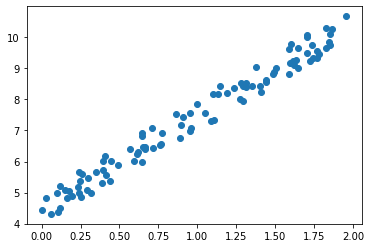

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [4]:
X_intercept = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(y)
theta_best

array([[4.48757715],
       [2.97427021]])

The function that we plot is y = 4 + 3x1 + Gaussian Noise, so we would have hoped for theta0 = 4 and theta1 = 3

In [5]:
X_new = np.array([[0],[2]])
X_new_intercept = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_intercept.dot(theta_best)

In [6]:
y_pred

array([[ 4.48757715],
       [10.43611757]])

(0.0, 2.0, 0.0, 15.0)

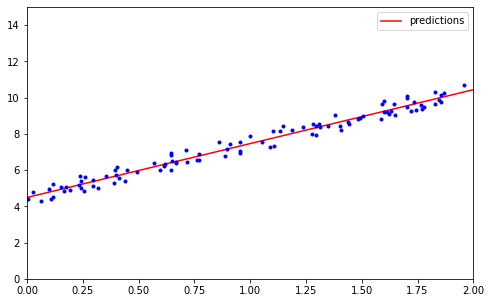

In [7]:
plt.figure(figsize=(8,5))
plt.plot(X_new, y_pred, 'r-',label='predictions')
plt.plot(X, y, "b.")
plt.legend()
plt.axis([0, 2, 0, 15])

Linear Regression using Scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)
print("Intercept: {}, Coeff:{}".format(lr_model.intercept_, lr_model.coef_)) # We find the same parameters as before
lr_model.predict(X_new)

Intercept: [4.48757715], Coeff:[[2.97427021]]


array([[ 4.48757715],
       [10.43611757]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_intercept, y, rcond=1e-6)
theta_best_svd

array([[4.48757715],
       [2.97427021]])

This function computes theta_hat = X+ y, where X+ is the *pseudoinverse* of X. 

In [10]:
np.linalg.pinv(X_intercept).dot(y)

array([[4.48757715],
       [2.97427021]])

Computational complexitiy: 
* Normal equation: O(n^2.4)
* Using svd : O(n^2)

## Gradient Descent

### Batch gradient descent

*Gradient descent step* :   
Theta+1 = Theta - eta * Derivée de MSE(Theta), où eta est le learning rate et theta le vecteur des paramètres 

In [11]:
eta = .1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # randn() generates an array from the normal distribution N(0,1)

for n in range(n_iterations):
    gradients = 2/m * X_intercept.T.dot(X_intercept.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.48757715],
       [2.97427021]])

That's exactly what we found using the Normal Equation!  

How to chose the correct number of iterations? Choose a very high number of iterations but stop the algorithm when your gradients vector is getting very small, i.e when values are less than an epsilon value, called the *tolerance*   

Convergence rate:  
When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch gradient descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while. It can take 0(1/epsilon) iterations. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that is uses the whole training set to compute the gradients at every step.  
At opposite, SGD picks a random instance in the training set at every step and computes the gradient only on that single instance.   
This obviously gets the computation time way faster but on the other hand do its stochastic nature, this algorithm is much less regular than BGD.  

One solution to this dilemma is to gradually reduce the learning rate. The function that determines the learning rate at each iteration is called the *learning schedule*


In [17]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_intercept[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch*m +i)
        theta = theta - eta*gradients
theta

array([[4.49095921],
       [2.96058444]])

**Warning note:**  When using SGD, the training instances must be independent and idenically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average.  
A simple way to ensure this is to shuffle the instances during training (pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances, for-example, if the instances are sorted by label then SGD will start by optimizing for one label, then the next one...

In [27]:
# SGD LR with maximum 1000 epochs, stop when the loss drop by less thant 0.001, with a lr starts with 0.1 and a default learning schedule, and no regularization (penality = None)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # .ravel() is for flatten
sgd_reg.intercept_, sgd_reg.coef_ # Once again we find a solution quite close to the one returned by the Normal Equation

(array([4.47002633]), array([2.98669865]))

### Comparison of algorithms for Linear Regression

| Algorithm       | Large m | Out-of-core support | Large n | Hyperparams                       | Scaling required | Scikit-learn     |
|-----------------|---------|---------------------|---------|-----------------------------------|------------------|------------------|
| Normal Equation | Fast    | No                  | Slow    | 0                                 | No               | N/A              |
| SVD             | Fast    | No                  | Slow    | 0                                 | No               | LinearRegression |
| Batch GD        | Slow    | No                  | Fast    | 2 (learning rate, tolerance rate) | Yes              | SGDRegressor     |
| Stochastic GD   | Fast    | Yes                 | Fast    | >2 (+ learning schedule)          | Yes              | SGDRegressor     |
| Mini-Batch GD   | Fast    | Yes                 | Fast    | >2 (+ learning schedule)          | Yes              | SGDRegressor     |

## Polynomial Regression